
# Practical task. Structure of the Kernel

In his work we'll be aiming to learn about various Kernel functions. 
The search of Kernel functions is usually a tough task especially in spaces with lots of dimensions. Therefore a finite number of possible functions are being tried out and one is chosen.

As usual task is to pick up a Kernel from existing ones, let's create a function genGraphs that will do most of the work and exactly print 4 graphs based on the following kernel function algorithms: linear, polinomial, rbf and sigmoid

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
def genGraphs(X,Y):
    # figure number
    fignum = 1
    
    # fit the model
    for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
        clf = svm.SVC(kernel=kernel, gamma=2)
        clf.fit(X, Y)
    
        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()
    
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')
    
        plt.axis('tight')
        x_min = -3
        x_max = 3
        y_min = -3
        y_max = 3
    
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
    
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
    
        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
    plt.show()

First let's start with a simple dataset to see if everything works. 
Note: it doesn't really have any clusters.

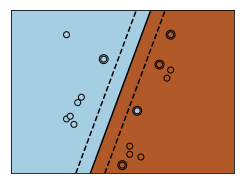

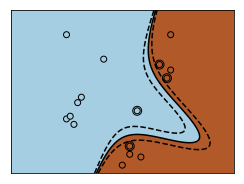

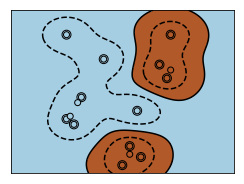

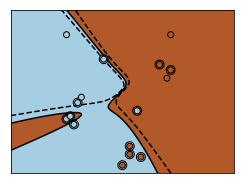

In [20]:
# Our dataset and targets
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8
genGraphs(X,Y)

# Circles
Now let's try out a dataset with clusters. Probably you've seen this kind of a dataset. We're going to generate it using a function "make_circles" from sklearn.datasets.samples_generator package. 

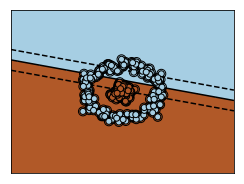

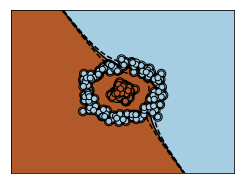

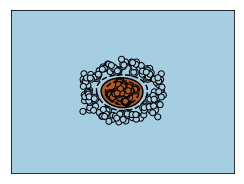

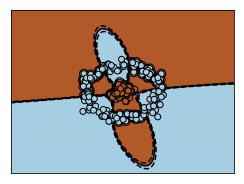

In [21]:
from sklearn.datasets.samples_generator import make_circles
X, Y = make_circles(300, factor=.1, noise=.1)
genGraphs(X,Y)

#### Question 1. Which of the 4 kernel functions works the best on this dataset?

Answer:______________________________

# Moons
Now let's try a new dataset called moons. In order to complete this task you have to write your own code. You have to import "make_moons" function from the same package as above and call it like this: make_moons(300, noise=.05)
#### Question 2. Write a Python code in order to import function "make_moons", create a dataset  using that function and draw graphs as explained above.

In [ ]:
# your code goes here...
genGraphs(X,Y)

#### Question 3. Once again which of the 4 algorithms works best on this dataset?
Answer:__